# Descriptive Statistic
teknik statistik yang bertujuan untuk mendeskripsikan datanya.

Kita akan coba deskripsikan data dengan melihat "tengah" datanya dimana, dan "penyebaran" datanya seperti apa.

## Population vs Sample
population: seluruh data yang berhubungan yang diperlukan

contoh kita mau tau rata2 berat badan orang Indonesia. berarti population adalah seluruh orang Indonesia. termasuk Jakarta, termasuk Malang, anak kecil, orang dewasa, kakek nenek... semua semuanya orang Indonesia harus ada di data baru jadilah sebuah data populasi. biasanya kita tidak bisa mendapatkan data populasi.

sample: sebagian dari data populasi, representatif.

saat ambil sample jangan ambil sebagian demografik saja. jadinya sample kurang akurat berakibat analisa yang kita lakukan ikutan tidak akurat.

## Outlier
data yang beda sendiri
- secara natural terjadi
- salah input
- efek dari observasi


# Measure of Central Tendencry
mengukur "tengah" sebuah data
- mean (rata2)
- median: angka yang ada di tengah saat data kita urutkan kecil ke besar..   
    misalnya nilai 10 20 30 40, jumlah data genap, kita bisa cari median dengan ambil data tengah (20 dan 30) ditambahkan lalu dibagi 2
- mode (modus): melihat angka yang paling sering muncul

nama lain median:
- quartile 2
- percentile 50

## Percentile
titik dimana angka tersebut lebih tinggi dari x % data lainnya..

misalnya Andhika dapat nilai ujian 60. Angka ujian ini ada di percentile ke-90 (90th percentile), artinya nilai Andhika lebih bagus daripada 90% murid di kelasnya.

sebaliknya misalnya nilainya dapat 90. Ternyata angka ini ada di percentile ke-30, artinya hanya 30% dari semua murid yang lain yang nilainya dibawah 90.

## Quartile
beberapa percentile spesial yang punya nama lain:
- percentile ke 25 = Quartile 1
- percentile ke 50 = Quartile 2 = median
- percentile ke 75 = Quartile 3

Inter-Quartile Range (IQR) adalah angka Q3 - Q1

data outlier adalah data diatas (maximum + 1.5 * IQR) atau dibawah (minimum - 1.5 * IQR)


# Measure of Spread
mengukur datanya seberapa tersebar
- standard deviation
- variance = standard deviation kuadrat
- range

Range adalah jarak antara angka max dan min


# Measure of Correlation
apakah ada korelasi antara dua set data

contoh: apakah ada hubungannya tinggi dengan berat badan.

gunakan `correlation coefficient` biasanya dipanggil `r` untuk ukur tingkat korelasi. value r hanya berada di antara -1 dan 1:
- r = 1, korelasi positif kuat
- r = 0, korelasi tidak ada
- r = -1, korelasi negatif kuat

`covariance` juga menunjukkan korelasi, tapi karena tidak ada range tertentu, tidak punya min/max, jadi cuma bisa dipakai untuk mengetahui korelasinya positif, tidak ada, atau negatif. kekuatan korelasi tidak ditunjukkan oleh angka ini.

In [1]:
# import package

import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

# Mencari mean di Python
- mean
- weighted mean
- geometric mean
- harmonic mean

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]

y = np.array(x)
y_with_nan = np.array(x_with_nan)

z = pd.Series(x)
z_with_nan = pd.Series(x_with_nan)

print(x)
print(y)
print(z)

[8.0, 1, 2.5, 4, 28.0]
[ 8.   1.   2.5  4.  28. ]
0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64


## Mean (rata2)

In [3]:
# bisa pakai package statistics
print(statistics.mean(x))
print(statistics.mean(x_with_nan))

8.7
nan


In [4]:
# bisa pakai numpy
print(np.mean(y))
print(np.mean(y_with_nan))

# numpy juga punya function nanmean
print(np.nanmean(y_with_nan))

8.7
nan
8.7


In [5]:
# bisa pakai pandas
print(z.mean())
print(z_with_nan.mean())

8.7
8.7


## Weighted Mean
saat setiap angka punya bobot yang berbeda. misalnya diberi nilai [50, 70, 80]

lalu dua nilai pertama bobotnya 20%, nilai ketiga bobotnya 60% karena ujian, berarti rata2 dari nilai ini tidak bisa ditambah semua lalu dibagi seperti mean biasa.

In [6]:
x = [20,30,80]
y = np.array(x)
z = pd.Series(x)

w = [0.2, 0.2, 0.6] # total berat biasanya 1.0

In [7]:
# pakai numpy dengan numpy array
print(np.average(y, weights = w))

58.0


In [8]:
# pakai numpy dengan pandas Series
print(np.average(z, weights = w))

58.0


## Harmonic Mean
mencari rata2 dengan tenik reciprocal.

cari rata-rata daru 1/20 1/30 1/80 lalu dibalik lagi hasilnya 1/hasil

teknik ini efektif untuk mencari rata-rata yang lebih merepresentasikan data disaat ada data outlier

In [9]:
# misal
x = [2, 6, 4, 100]
y = np.array(x)
z = pd.Series(x)

In [10]:
# mean biasa
print(statistics.mean(x))

28


In [11]:
# pakai cara statistics
print(statistics.harmonic_mean(x))

4.316546762589928


In [12]:
# pakai cara scipy.stats
print(scipy.stats.hmean(y)) #array bisa
print(scipy.stats.hmean(z)) #series bisa

4.316546762589928
4.316546762589928


## Geometric Mean
mencari rata-rata dari data yang skala nya berbeda. misalnya: mau beli kamera. Ada 2 toko:
- toko A, rating 3/5, jumlah reviews 115
- toko B, rating 4/5, jumlah reviews 92

In [13]:
x1 = [3/5, 115]
x2 = [4/5, 92]

y1 = np.array(x1)
y2 = np.array(x2)

z1 = pd.Series(x1)
z2 = pd.Series(x2)

In [14]:
# pakai scipy stats untuk cari gmean
print(scipy.stats.gmean(y1))
print(scipy.stats.gmean(y2))

8.306623862918077
8.579044235810887


In [15]:
print(scipy.stats.gmean(z1))
print(scipy.stats.gmean(z2))

8.306623862918077
8.579044235810887


dari gmean nya terlihat toko B nilainya sedikit lebih baik. kita beli kamera di toko B saja.

## Median

In [16]:
x = [8.0, 1, 2.5, 4, 28.0]
y = np.array(x)
z = pd.Series(x)

x2 = [8.0, 1, 2.5, 4, 28.0, 1.8]
y2 = np.array(x2)
z2 = pd.Series(x2)

In [17]:
x.sort()
print(x)

x2.sort()
print(x2)

[1, 2.5, 4, 8.0, 28.0]
[1, 1.8, 2.5, 4, 8.0, 28.0]


In [18]:
# menggunakan statistics
print(statistics.median(x))
print(statistics.median(x2))

4
3.25


package statistics juga bisa cek jika median nya adalah 2 angka, apa angka tinggi dan rendahnya

In [19]:
print(statistics.median_high(x))
print(statistics.median_low(x))

print(statistics.median_high(x2))
print(statistics.median_low(x2))

4
4
4
2.5


In [20]:
# pakai numpy
print(np.median(y))
print(np.median(y2))

4.0
3.25


## Mode
modus, mencari angka yang paling sering muncul

In [21]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]

In [22]:
# pakai statistics
print(statistics.mode(u))
print(statistics.mode(v))

2
12


In [23]:
# pakai scipy stats
print(scipy.stats.mode(u))
print(scipy.stats.mode(v))

ModeResult(mode=array([2]), count=array([2]))
ModeResult(mode=array([12]), count=array([3]))


In [24]:
# pakai pandas
u = pd.Series(u)
v = pd.Series(v)

print(u.mode())
print(v.mode())

0    2
dtype: int64
0    12
1    15
dtype: int64


# Measure of Spread
- std dev, variance, range, quartile, percentile

## Variance - std dev sebelum di akar


In [26]:
x = [8.0, 1, 2.5, 4, 28.0]
y = np.array(x)
z = pd.Series(x)

# pakai statistics
print(statistics.variance(x))

123.2


In [27]:
# pakai numpy
print(np.var(x, ddof=1))

123.19999999999999


In [28]:
# pakai pandas
print(z.var(ddof=1))

123.19999999999999


## Standard Deviation
kira2 datanya dari rata2 tersebar sejauh apa, plus minus dari rata2 kira2 berapa

In [29]:
x = [8.0, 1, 2.5, 4, 28.0]
y = np.array(x)
z = pd.Series(x)

# pakai statistics
print(statistics.stdev(x))

11.099549540409287


In [30]:
123.2** 0.5 # variance kalau di akar 2 akan dapat std dev

11.099549540409287

In [31]:
# pakai numpy
print(np.std(x, ddof=1))

11.099549540409285


In [32]:
# pakai pandas
print(z.std(ddof=1))

11.099549540409285


# Percentiles
mendapatkan angka yang ada di posisi ke x % dari seluruh data

# Quantiles
angka2 percentil spesial: percentile 25: q1, percentile 50: q2, percentile 75: q3

In [35]:
x = [8.0, 1, 2.5, 4, 28.0]
y = np.array(x)
z = pd.Series(x)

# pakai statistics
print(statistics.quantiles(x, n=2, method='inclusive'))
print(statistics.quantiles(x, n=4, method='inclusive'))

[4.0]
[2.5, 4.0, 8.0]


In [38]:
# pakai numpy
print(np.percentile(y, 50))
print(np.percentile(y, [25, 50, 75]))

# bisa juga numpy quantile (tulis 5% => 0.05)
print(np.quantile(y, 0.5))
print(np.quantile(y, [0.25, 0.5, 0.75]))

4.0
[2.5 4.  8. ]
4.0
[2.5 4.  8. ]


In [39]:
# pakai pandas
print(z.quantile(0.5))
print(z.quantile([0.25, 0.5, 0.75]))

4.0
0.25    2.5
0.50    4.0
0.75    8.0
dtype: float64


# Range
mencari perbedaan angka max dan min

# Inter-Quartile range
mencari perbedaan angka Q3 dan Q1

In [41]:
x = [8.0, 1, 2.5, 4, 28.0]
y = np.array(x)
z = pd.Series(x)

# pakai numpy
print("range")
print(np.max(y) - np.min(y))

range
27.0


In [42]:
print("interquartile range")
print(np.percentile(y, 75) - np.percentile(y, 25))

interquartile range
5.5


In [43]:
print("q3", np.percentile(y, 75))
print("q1", np.percentile(y, 25))

q3 8.0
q1 2.5


# Summary

In [44]:
# pakai scipy stats describe
print(scipy.stats.describe(x))

DescribeResult(nobs=5, minmax=(1.0, 28.0), mean=8.7, variance=123.19999999999999, skewness=1.3061163034727836, kurtosis=-0.030495095281138695)


In [47]:
stats_x = scipy.stats.describe(x)
print(stats_x.mean) # contoh pakai hasil scipy stats describe untuk ambil rata2
print(stats_x.variance)

8.7
123.19999999999999


In [48]:
# descibe milik pandas
print(z.describe())

count     5.00000
mean      8.70000
std      11.09955
min       1.00000
25%       2.50000
50%       4.00000
75%       8.00000
max      28.00000
dtype: float64


# Measure of Correlation

In [49]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

## Covariance

In [50]:
# pakai numpy
np.cov(x_, y_)

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

covariance matrix, 4 angka: variance x, covariance x dan y 2 kali, variance y

In [53]:
# mau ambil covariancenya
print(np.cov(x_,y_)[0,1])

# kalau penasaran boleh coba cari variance x, dan variance y

19.95


In [52]:
# pakai pandas
print(x__.cov(y__))

19.95


## Correlation Coefficient

In [55]:
# menggunakan scipy stats
r, pvalue = scipy.stats.pearsonr(x_, y_)
print(r)

0.8619500056316058


Text(0, 0.5, 'y_')

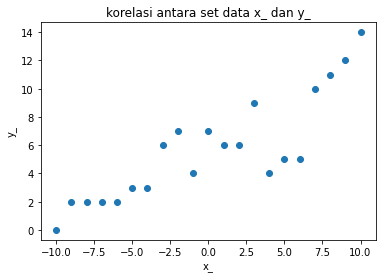

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x_, y_)
plt.title("korelasi antara set data x_ dan y_")
plt.xlabel("x_")
plt.ylabel("y_")

In [58]:
# kalau pakai numpy
print(np.corrcoef(x_, y_)[0,1])

0.8619500056316061


In [59]:
# pakai pandas
print(x__.corr(y__))

0.8619500056316061
